# Exploring the SFA Wiki page with spaCy and Texacy

TextaCy is package that works with spaCy documents to help extract information, stats and interact with other packages such as SciKit Learn and Gensim. Lets see what we can extrqct from some basic text using both packages.

In [1]:
import textacy
import spacy
import string
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
# Load the large English NLP model
nlp = spacy.load('en')

In [3]:
# The text we want to examine
file = open('data/sfa_wiki.txt','r') 
text_raw = file.read()

In [4]:
text = text_raw.replace('Super Furry Animals', 'SFA')
print(text)

SFA are a Welsh psychedelic rock band. Since their formation in Cardiff, Wales, in 1993, the band has consisted of Gruff Rhys (lead vocals, guitar), Huw Bunford (lead guitar, vocals), Guto Pryce (bass guitar), Cian Ciaran (keyboards, synthesisers, various electronics, occasional guitar, vocals) and Dafydd Ieuan (drums, vocals). Actor Rhys Ifans is also a former member. SFA have recorded nine UK Albums Chart Top 25 studio albums (one BPI certified Gold and four certified Silver), plus numerous singles, EPs, compilations and collaborations. Over the course of nine albums, SFA have been described as: "one of the most imaginative bands of our time" by Billboard, while according to a 2005 article in NME, "There's a case to be argued that [SFA] are the most important band of the past 15 years". SFA formed in Cardiff after being in various other Welsh bands and techno outfits in the area. Ifans, Ieuan and Pryce had been together since the early 1990s and had toured France as a techno group. A

# Working with Textacy

Textacy builds ontop of spaCy to help extract some key information. Lets see what we can do with it.

### Lets look at some keywords in context
This is a good way to assess by eye how a particular phrase of word is used through the text:

In [5]:
textacy.text_utils.KWIC(text, 'welsh language', window_width=35)

 work: a largely acoustic album of  Welsh language  songs entitled Mwng. Meaning "mane
ent for its efforts in keeping the  Welsh language  alive.

2000 also saw the Furries 


You can also perform some pre-processing with textacy  such as remove white spaces etc. 

For example ```textpp = textacy.preprocess.normalize_whitespace(text)``` and build some basic pipelines
<br>
```textpp = textacy.preprocess.normalize_whitespace(text)```
<br>

But to build on what we have already learnt and to ensure we understand what is being done, lets use spaCy directly to pre-process text. 

## Process the text using spaCy

In [6]:
# Parse the document with spaCy
nlp.add_pipe

doc = nlp(text)

### Add metadata to the document
This is a useful way to keep extra information with the document - if you have many documents this is a great way to manage them. 

In [7]:
metadata = {
    'title': 'SFA History',
    'url': 'https://en.wikipedia.org/wiki/Super_Furry_Animals',
    'source': 'wikipedia',
}

doc = textacy.Doc(text, metadata=metadata)
doc.metadata['title']

'SFA History'

### Explore n-grams

n-grams allow us to split the document into tokens that consist of n consecutive words - we can also filter by the typres Lets split the text into tokens of 2-grams, filtering out any stopwords. This can often help to keep some meaning to the tokens.

In [8]:
list(textacy.extract.ngrams(doc, 2, filter_stops=True, filter_punct=True, filter_nums=False))[:15]

[Welsh psychedelic,
 psychedelic rock,
 rock band,
 Gruff Rhys,
 lead vocals,
 Huw Bunford,
 lead guitar,
 Guto Pryce,
 bass guitar,
 Cian Ciaran,
 occasional guitar,
 Dafydd Ieuan,
 Actor Rhys,
 Rhys Ifans,
 UK Albums]

### Get the key terms in the text
Exrtract key terms from a document by ranking nodes in a semantic network of terms, connected by edges and weights specified by parameters.


In [9]:
import textacy.keyterms  # note the import
textacy.keyterms.textrank(doc, normalize='lemma', n_keyterms=10)

[('album', 0.023037234903108442),
 ('sfa', 0.019853210898839437),
 ('band', 0.018133944931207485),
 ('single', 0.013309686079053334),
 ('no', 0.011012237412008687),
 ('track', 0.01075797292416258),
 ('welsh', 0.008842835940716382),
 ('song', 0.007470957886317374),
 ('release', 0.006214188489205524),
 ('ep', 0.005713070059801905)]

In [10]:
list(textacy.extract.ngrams(doc, 2, min_freq=2))

[Gruff Rhys,
 lead vocals,
 Guto Pryce,
 Dafydd Ieuan,
 Rhys Ifans,
 Welsh bands,
 The band,
 Welsh bands,
 Acid Casuals,
 Placid Casual,
 Placid Casual,
 The band,
 Dim Brys,
 Dim Chwys,
 band's,
 compilation album,
 Moog Droog,
 Show Me,
 Me Magic,
 Moog Droog,
 Creation Records,
 Alan McGee,
 The band,
 Welsh media,
 Dafydd Ieuan,
 Welsh media,
 It's,
 The band,
 band's,
 Hometown Unicorn,
 Show Me,
 Me Magic,
 Moog Droog,
 In May,
 debut album,
 Fuzzy Logic,
 album track,
 You Do,
 Don't,
 The Man,
 Man Do,
 Don't,
 n't Give,
 The Man,
 Man Do,
 Don't,
 n't Give,
 limited edition,
 hit No,
 Fuzzy Logic,
 new album,
 hitting No,
 cover art,
 Pete Fowler,
 Hey Venus,
 The album,
 Fuzzy Logic,
 hit No,
 music press,
 Ice Hockey,
 Hockey Hair,
 Ice hockey,
 hockey hair,
 hitting No,
 Dim Brys,
 Dim Chwys,
 band's,
 The Man,
 Man Do,
 Don't,
 n't Give,
 A limited,
 limited edition,
 debut album,
 In May,
 new album,
 SFA's,
 Beach Boys,
 The album,
 Some Things,
 Things Come,
 Come From

### Get a list of the named entities in the text

In [11]:
list(textacy.extract.named_entities(doc, drop_determiners=True))

[Welsh,
 Cardiff, Wales,
 1993,
 Gruff Rhys,
 Huw Bunford,
 Guto Pryce,
 Cian Ciaran,
 Dafydd Ieuan,
 Rhys,
 Ifans,
 nine,
 UK,
 Albums Chart Top,
 25,
 one,
 BPI,
 Gold,
 four,
 nine,
 SFA,
 one,
 Billboard,
 2005,
 NME,
 SFA,
 past 15 years,
 SFA,
 Cardiff,
 Welsh,
 Ifans,
 Ieuan,
 Pryce,
 early 1990s,
 France,
 Bunford,
 Ciaran,
 Ieuan,
 1995,
 Ankst,
 Welsh,
 Welsh,
 1990s,
 Welsh,
 Manic Street Preachers,
 Catatonia,
 Stereophonics,
 Gorky,
 Zygotic Mynci,
 Rhys,
 SFA,
 SFA,
 Placid Casual,
 Placid Casual,
 Blur,
 Elvis Costello,
 Wynton Marsalis,
 Dim Brys: Dim Chwys,
 1994,
 Radio Cymru,
 August 1995,
 EP,
 Ankst,
 Llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch,
 June 1995,
 Guinness Book of Records,
 EP,
 David Pugh,
 October 1995,
 Robert Moog,
 Nadsat,
 Clockwork Orange,
 EP,
 Welsh,
 Welsh,
 Moog Droog,
 London,
 late 1995,
 Creation Records,
 Alan McGee,
 Primal Scream,
 My Bloody Valentine,
 Oasis,
 McGee,
 English,
 Welsh,
 English,
 McGee,
 Welsh,
 SFA,
 Wels

### You can look for phrases that follow specific patterns on PoS
Extract sequences of consecutive tokens from a spaCy document whose part of speeech tags match the regex pattern.

In [12]:
pattern = textacy.constants.POS_REGEX_PATTERNS['en']['NP']
pattern

'<DET>? <NUM>* (<ADJ> <PUNCT>? <CONJ>?)* (<NOUN>|<PROPN> <PART>?)+'

In [13]:
list(textacy.extract.pos_regex_matches(doc, pattern))

[SFA,
 a Welsh,
 psychedelic rock band,
 their formation,
 Cardiff,
 Wales,
 the band,
 Gruff Rhys,
 lead vocals,
 guitar,
 Huw Bunford,
 lead guitar,
 vocals,
 Guto Pryce,
 bass guitar,
 Cian Ciaran,
 keyboards,
 synthesisers,
 various electronics,
 occasional guitar,
 vocals,
 Dafydd Ieuan,
 drums,
 vocals,
 Actor Rhys Ifans,
 a former member,
 SFA,
 nine UK Albums Chart Top,
 25 studio albums,
 one BPI,
 Gold,
 Silver,
 numerous singles,
 EPs,
 compilations,
 collaborations,
 the course,
 nine albums,
 SFA,
 imaginative bands,
 our time,
 Billboard,
 a 2005 article,
 NME,
 a case,
 SFA,
 important band,
 15 years,
 SFA,
 Cardiff,
 various other Welsh bands,
 techno outfits,
 the area,
 Ifans,
 Ieuan,
 Pryce,
 the early 1990s,
 France,
 a techno group,
 Bunford,
 Ciaran,
 Ieuan's,
 younger brother,
 some songs,
 Ankst,
 a Welsh indie label,
 The band,
 part,
 the renaissance,
 Welsh music,
 art,
 literature,
 other Welsh bands,
 the time,
 the Manic Street Preachers,
 Catatonia,
 Ste

### Document Stats

In [14]:
ts = textacy.TextStats(doc)
ts.n_unique_words

1209

In [15]:
ts.readability_stats

{'flesch_kincaid_grade_level': 9.246983307520221,
 'flesch_reading_ease': 66.45414896151863,
 'smog_index': 10.85378579242651,
 'gunning_fog_index': 11.920281164369962,
 'coleman_liau_index': 9.636779291666667,
 'automated_readability_index': 10.64650078432151,
 'lix': 41.1262062666296,
 'gulpease_index': 57.53747203579419,
 'wiener_sachtextformel': 4.603759741471744}

## Create Bag of Terms
a set of unique terms in a document mapped to their frequency of occurence, terms includes n-grams and /or named entities. 

In [16]:
bot = doc.to_bag_of_terms(
         ngrams=(1, 2, 3), named_entities=True, weighting='count',
        as_strings=True)

sorted(bot.items(), key=lambda x: x[1], reverse=True)[:15]

[('the', 60),
 ('album', 52),
 ('release', 43),
 ('sfa', 41),
 ('band', 35),
 ('no', 31),
 ('-PRON-', 30),
 ("'s", 29),
 ('single', 26),
 ('chart', 23),
 ('track', 21),
 ('in', 19),
 ('welsh', 17),
 ('record', 14),
 ('first', 13)]

### Extract Semi Structured Statements
looks for entity, cue, fragemnt triplet

In [17]:
# Extract semi-structured statements
statements = textacy.extract.semistructured_statements(doc, "SFA", cue = 'be')

# Print the results
print("Here are the things I know about the Super Furry Animals:")

for statement in statements:
    subject, verb, fact = statement
    print(f" - {fact}  ->{subject}  ->{verb}")

Here are the things I know about the Super Furry Animals:
 - a Welsh psychedelic rock band  ->SFA  ->are
 - the most important band of the past 15 years  ->SFA  ->are


In [18]:
list(textacy.extract.subject_verb_object_triples(doc))

[(SFA, are, Welsh psychedelic rock band),
 (Actor Rhys Ifans, is, member),
 (SFA, have recorded, Albums),
 (BPI, certified, Gold),
 (BPI, certified, Silver),
 (There, 's, case),
 (SFA, are, band),
 (they, wrote, songs),
 (band, are considered, to be),
 (Welsh bands, include, Preachers),
 (Welsh bands, include, Catatonia),
 (Welsh bands, include, Stereophonics),
 (Welsh bands, include, Mynci),
 (She, was making, shirts),
 (band, made, reference),
 (SFA track, is, Brys),
 (track, shows, roots),
 (band, put, debut EP),
 (title, is, pun),
 (who, signed, them),
 (McGee, asked, them),
 (Welsh accents, were, strong.[12),
 (SFA, received, criticism),
 (we, played, festival),
 (Welsh media, started, foaming),
 (we, were singing, songs),
 (33, became, single),
 (it, garnered, interest),
 (Something, was given, radio airplay),
 (Man, Don't Give, Fuck),
 (there, were, problems),
 (which, formed, basis),
 (Man, Don't Give, Fuck),
 (they, managed, this),
 (there, was, release),
 (This, cemented, sta

### Extract Quotations

In [19]:
quotes = textacy.extract.direct_quotations(doc)


for quote in quotes:
    print(quote)

(David Pugh, says, "They are great!")
(band, claimed, "It all started when we played this festival in West Wales, and for some reason the Welsh media started foaming at the mouth because we were singing songs in Welsh and English. But they get The Dubliners playing and they don't sing in Irish. It's ridiculous.")


In [20]:
list(textacy.extract.noun_chunks(doc))

[SFA,
 Welsh psychedelic rock band,
 their formation,
 Cardiff,
 Wales,
 band,
 Gruff Rhys,
 (lead vocals,
 guitar,
 (lead guitar, vocals,
 bass guitar,
 drums, vocals,
 Actor Rhys Ifans,
 former member,
 SFA,
 nine UK Albums,
 Chart Top,
 25 studio albums,
 one BPI,
 Gold,
 four certified Silver,
 numerous singles,
 EPs,
 compilations,
 collaborations,
 course,
 nine albums,
 SFA,
 most imaginative bands,
 our time,
 Billboard,
 2005 article,
 NME,
 case,
 [SFA,
 most important band,
 past 15 years,
 SFA,
 Cardiff,
 various other Welsh bands,
 techno outfits,
 area,
 Ifans,
 Ieuan,
 Pryce,
 early 1990s,
 France,
 techno group,
 Bunford,
 Ciaran,
 (Ieuan's younger brother,
 they,
 songs,
 Ankst,
 Welsh indie label,
 band,
 part,
 renaissance,
 Welsh music,
 art,
 literature,
 other Welsh bands,
 time,
 Manic Street Preachers,
 Catatonia,
 Stereophonics,
 Gorky's Zygotic Mynci,
 name,
 band,
 T-shirts,
 Rhys' sister,
 She,
 SFA T-shirts,
 fashion and music collective Acid Casuals,
 vari

## Generate WordClouds

Lets look at how we can generate those famous wordclouds!

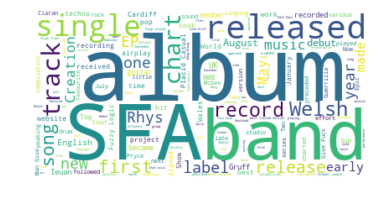

In [21]:
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Lets make the wordcloud look like the album cover!

In [22]:
mask = np.array(Image.open("images/220px-Radiator-SFA.jpg"))

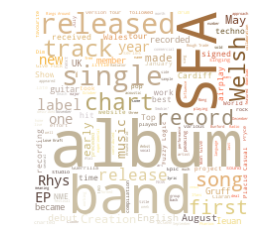

In [23]:
wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)

plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/SFAOK.png", format="png", bbox_inches="tight")

plt.show()